In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

import os
import numpy as np
import matplotlib.pyplot as plt
import file_loading
from scipy.interpolate import Rbf
from multiprocessing import Pool
from astropy.io import ascii

from forecast import build_interp_zack
from forecast import findlevel
from forecast import plot_cube

# ngal40

PS bins [24]
PC bins [184]
PS nr 1000 nb 24 0.974974974974975
PC nr 1000 nb 184 0.8148148148148148
PC bins [184]
PC nr 9999 nb 184 0.9814962992598519
CPU times: user 9.01 s, sys: 608 ms, total: 9.62 s
Wall time: 4.16 s


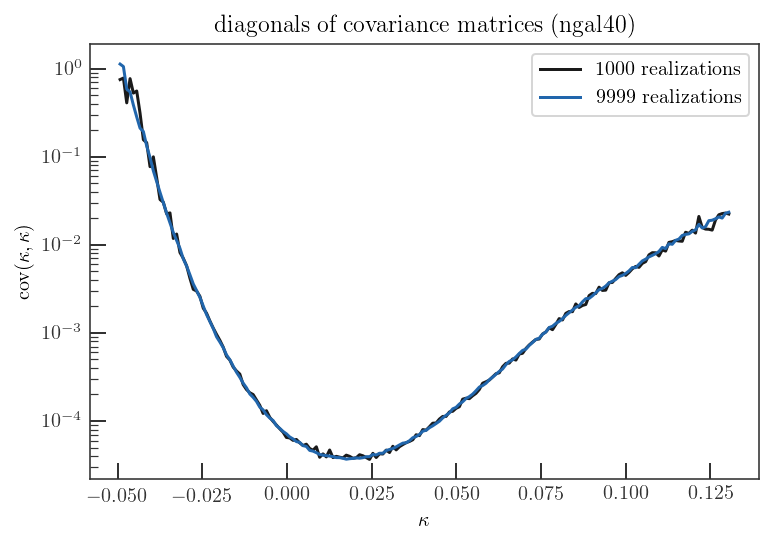

In [4]:
%%time
output_cube_name = '1ngal40'
data_dir = '/home/zequnl/Projects/neutrino_mpk/'
table = ascii.read('parameters.table')

params, obsarr_PS, obsarr_PC, ell, kappa, invcov_PS, invcov_PC = \
                file_loading.get_data_arrays_across_redshifts( table,
                    data_dir = data_dir,
                    PS_directory = data_dir + 'powerspectrum_ngal40', 
                    PC_directory = data_dir + 'peakcounts_ngal40',
                    redshifts = ['10'])

    
test_invcov = file_loading.compute_custom_PC_cov(  ['10'], 
     fid_string='Om0.29997_As2.10000_mva0.00000_mvb0.00000_mvc0.00000_h0.70000_Ode0.69995_PC_S_z10_cov_ngal40.npy', 
                                                 kappa_min = -0.05
                                    )

plt.title('diagonals of covariance matrices (ngal40)')
plt.plot( kappa, np.diag(invcov_PC), '-' , label='1000 realizations')
plt.plot( kappa, np.diag(test_invcov), '-' , label='9999 realizations' )

plt.xlabel(r'$\kappa$')
plt.ylabel(r'cov($\kappa,\kappa)$')
plt.legend()
plt.yscale('log')


plt.savefig('figures/fig_compare_covariances.pdf')


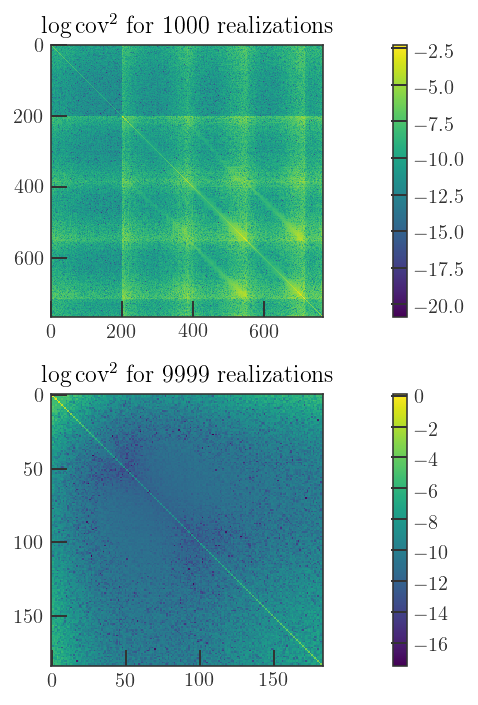

In [16]:

fig, ax = plt.subplots(2,1,figsize=(10,5))
im0 = ax[0].imshow( np.log10(invcov_PC**2) )
im1 = ax[1].imshow( np.log10(test_invcov**2) )

ax[0].set_title(r'$\log \text{cov}^2$ for 1000 realizations')
ax[1].set_title(r'$\log \text{cov}^2$ for 9999 realizations')
plt.colorbar(im0, ax=ax[0])
plt.colorbar(im1, ax=ax[1])
plt.tight_layout()
plt.savefig('fig_cov_viz.pdf')

# 4 redshifts

In [7]:
%%time
output_cube_name = '5red'
data_dir = '/home/zequnl/Projects/neutrino_mpk/'
table = ascii.read('parameters.table')

params, obsarr_PS, obsarr_PC, ell, kappa, invcov_PS, invcov_PC = \
                file_loading.get_data_arrays_across_redshifts( table,
                    data_dir = data_dir,
                    PS_directory = data_dir + 'powerspectrum_noisy', 
                    PC_directory = data_dir + 'peakcounts_noisy',
                    redshifts = ['05', '10', '15', '20', '11000'])

    
test_invcov = file_loading.compute_custom_PC_cov(  ['05', '10', '15', '20', '11000'] )

plt.title('diagonals of covariance matrices (4 redshifts)')
plt.plot( kappa, np.diag(invcov_PC), '.' , label='1000 realizations')
plt.plot( kappa, np.diag(test_invcov), '.' , label='9999 realizations' )

plt.xlabel(r'$\kappa$')
plt.ylabel(r'cov($\kappa,\kappa)$')
plt.legend()
plt.yscale('log')



PS bins [24, 24, 24, 24, 19]
PC bins [153, 143, 140, 139, 135]
PS nr 1000 nb 115 0.8838838838838838
PC nr 1000 nb 710 0.2882882882882883


LinAlgError: Singular matrix

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(10,5))
im0 = ax[0].imshow( np.log10(invcov_PC**2), vmin=-18, vmax=6 )
im1 = ax[1].imshow( np.log10(test_invcov**2), vmin=-18, vmax=6 )

ax[0].set_title(r'$\log \text{cov}^2$ for 1000 realizations')
ax[1].set_title(r'$\log \text{cov}^2$ for 9999 realizations')
plt.colorbar(im0, ax=ax[0])
plt.colorbar(im1, ax=ax[1])

PC bins [153]
PC bins [153, 143]
PC bins [153, 143, 140]
PC bins [153, 143, 140, 139]
PC nr 9999 nb 575 0.9423884776955391


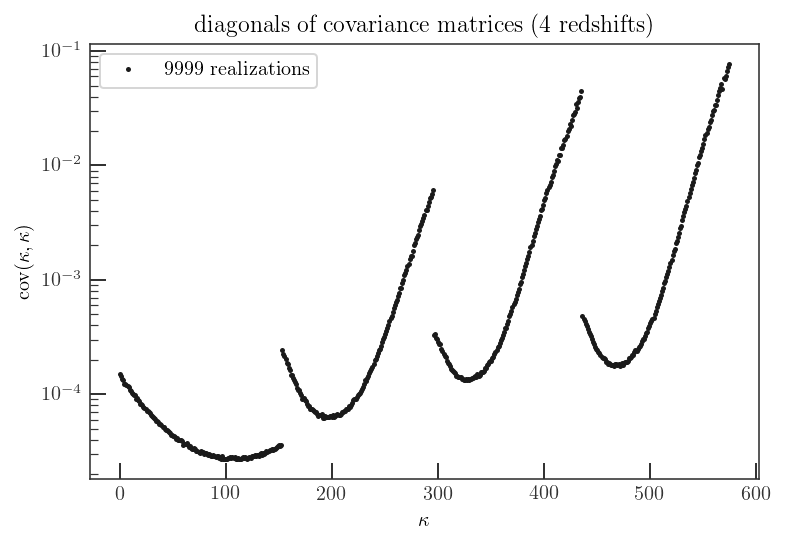

In [5]:

test_invcov = file_loading.compute_custom_PC_cov(  ['05', '10', '15', '20'] )

plt.title('diagonals of covariance matrices (4 redshifts)')
# plt.plot( np.diag(invcov_PC), '.' , label='1000 realizations')
plt.plot( np.diag(test_invcov), '.' , label='9999 realizations' )

plt.xlabel(r'$\kappa$')
plt.ylabel(r'cov($\kappa,\kappa)$')
plt.legend()
plt.yscale('log')


PS bins [24, 24, 24, 24, 19]
PC bins [200, 184, 170, 163, 50]
PS nr 1000 nb 115 0.8838838838838838
PC nr 1000 nb 767 0.23123123123123124


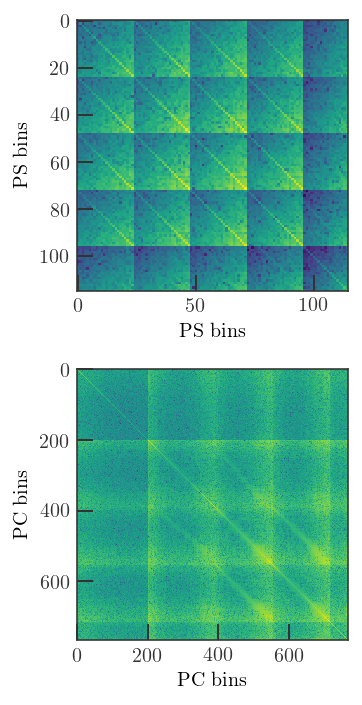

In [15]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

import os
import numpy as np
import matplotlib.pyplot as plt
import file_loading
from scipy.interpolate import Rbf
from multiprocessing import Pool
from astropy.io import ascii

from forecast import build_interp_zack
from forecast import findlevel
from forecast import plot_cube

output_cube_name = '2all5redshifts'
data_dir = '/home/zequnl/Projects/neutrino_mpk/'
table = ascii.read('parameters.table')

params, obsarr_PS, obsarr_PC, ell, kappa, invcov_PS, invcov_PC = \
                file_loading.get_data_arrays_across_redshifts( table,
                    data_dir = data_dir,
                    PS_directory = data_dir + 'powerspectrum_noisy', 
                    PC_directory = data_dir + 'peakcounts_noisy',
                    redshifts = ['05', '10', '15', '20', '11000'])

fig, axes = plt.subplots(2,1,figsize=(10,5))
axes[0].imshow( np.log10(invcov_PS**2) )
axes[1].imshow( np.log10(invcov_PC**2) )
axes[0].set_xlabel('PS bins')
axes[0].set_ylabel('PS bins')
axes[1].set_xlabel('PC bins')
axes[1].set_ylabel('PC bins')
# np.linalg.inv(invcov_PC)
plt.tight_layout()
plt.savefig('figures/fig_cov_5z.pdf')

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

import os
import numpy as np
import matplotlib.pyplot as plt
import file_loading
from scipy.interpolate import Rbf
from multiprocessing import Pool
from astropy.io import ascii

from forecast import build_interp_zack
from forecast import findlevel
from forecast import plot_cube

output_cube_name = '2all5redshifts'
data_dir = '/home/zequnl/Projects/neutrino_mpk/'
table = ascii.read('parameters.table')

PC_arr = \
                file_loading.get_data_arrays_across_redshifts( table,
                    data_dir = data_dir,
                    PS_directory = data_dir + 'powerspectrum_noisy', 
                    PC_directory = data_dir + 'peakcounts_noisy',
                    redshifts = ['05', '10', '15', '20', '11000'])

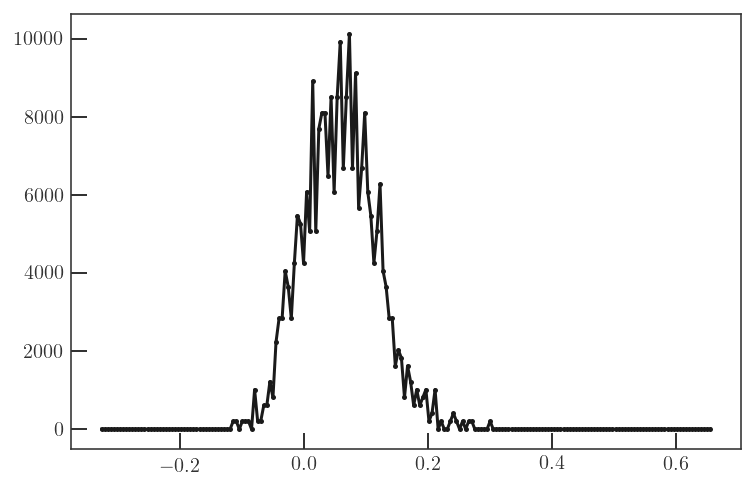

In [3]:
kappa = PC_arr[0,:]
realizations = PC_arr[2:,:]

plt.plot(kappa, realizations[0])